In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Gradient descent

In [18]:
from sklearn.model_selection import train_test_split 
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101 )

In [103]:
NUM_OF_ITERATIONS = 1000
m = len(x_train)
print(m)
number_of_features = len(x_train.columns)
theta = 100 * np.ones(number_of_features)
alpha = 0.01
batch_size = 30
for epoch in range(NUM_OF_ITERATIONS):
    if epoch % 10 == 0:
        print("Epoch ", epoch, theta, getRMSE())
    gradient = np.random.rand(number_of_features)
    for i in range(m): # number of data elements
        y_e = x_train.iloc[i].values * theta # current Y estimaded
        gradient += (y_e * x_train.iloc[i].values - y_train.iloc[i]* x_train.iloc[i].values)
        gradient /= m
   
    theta -= alpha * gradient
    gradient = -1000 * np.ones(number_of_features)

350
Epoch  0 [100. 100. 100. 100.] 8073.641778140997
Epoch  10 [ 78.28344843  98.0574615   70.10040186 100.07245618] 6224.505787064475
Epoch  20 [ 62.21941792  96.18590362  50.59169826 100.14443434] 4948.082147811636
Epoch  30 [ 50.33663462  94.38273272  37.86278084 100.21593765] 4061.9276106499324
Epoch  40 [ 41.54677713  92.64544993  29.55749607 100.28696922] 3442.741361175579
Epoch  50 [ 35.04479921  90.97164768  24.13851559 100.35753217] 3006.9188684079904
Epoch  60 [ 30.23519713  89.3590064   20.60277295 100.4276296 ] 2697.576140461563
Epoch  70 [ 26.67746862  87.80529124  18.29579361 100.49726458] 2475.8701218928577
Epoch  80 [ 24.04576813  86.30834905  16.7905501  100.56644015] 2315.1774073211964
Epoch  90 [ 22.09906325  84.86610533  15.80841819 100.63515935] 2197.1790251757116
Epoch  100 [ 20.659059    83.47656139  15.16760288 100.70342519] 2109.2194301896116
Epoch  110 [ 19.59386814  82.13779157  14.74948769 100.77124066] 2042.519498993853
Epoch  120 [ 18.80593188  80.84794059

Epoch  990 [ 16.56667757  48.17214007  13.96448452 105.27951536] 1518.0371252465713


In [78]:
theta = np.random.rand(number_of_features)
y_e = x_train.iloc[0].values * theta
gradient = np.random.rand(number_of_features)
print(gradient)
gradient += (y_e - y_train.iloc[0])
print(gradient)
print(x_train.iloc[0].values)
gradient *= x_train.iloc[0].values
print(gradient)

[0.01058438 0.26496944 0.68883012 0.12414369]
[-428.96825779 -441.21499789 -421.40142675 -442.01533624]
[31.52575242 11.34003593 37.03951365  3.81124817]
[-13523.54708988  -5003.39392983 -15608.50389943  -1684.63014172]


In [100]:
def getRMSE():
    predictions = []
    for i in range(len(x_test)):
        prediction = 0
        for j in range(number_of_features):
            prediction += x_test.iloc[i][j] * theta[j]
        predictions += [prediction]
    return np.sqrt(metrics.mean_squared_error(y_test, predictions))
    

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1017.2325531021465
MSE: 1037293.7855081086
RMSE: 1018.4762076298633


Text(0, 0.5, 'Predicted Y')

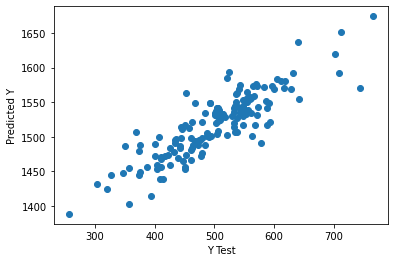

In [55]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')